# <font color='red'>TME ROBOTIQUE ET APPRENTISSAGE</font>
# <font color='red'>Evolution de structures</font>

<font color="red">Version étudiant 2021-2022</font>

*mise à jour: 11/04/2022*

Ce notebook peut être exécuté dans [Google Colab](colab.research.google.com/)

Pour faciliter la lisibilité du notebook, le code donné, à écrire ou à compléter est dans les cellules en annexe, à la fin du notebook. Les cellules de réponses ne doivent contenir que les quelques instructions permettant d'afficher les résultats (éventuellement des appels permettant de les générer) et les commentaires d'analyse associés.

Vous devez déposer votre travail sur Moodle:
* déposer votre notebook, avec le nom de fichier *obligatoirement* au format suivant: **RA_NOM1_NOM2.ipynb**
* toutes les cellules exécutées
* des graphes et un commentaire sur les résultats obtenus
* affichage limité au nécessaire pour assurer la lisibilité du notebook (pas d'affichage de debug ni de centaines de graphes !)

*Le sujet est à faire en binome.*

# COMPLETEZ LES CHAMPS CI-DESSOUS AVEC NOM/PRENOM/CARTE_ETU:

* Étudiant 1: **ABITBOL YOSSEF 3804139**
* Étudiant 2: **DUFOURMANTELLE JEREMY 21104331**

## Introduction

Ce TME est composé de deux parties indépendantes qui s'appuieront toutes deux sur le framework DEAP que vous avez utilisé lors des TME précédents. 

Dans la première partie, vous ferez de la regression symbolique avec de la programmation génétique.

Dans la seconde partie, vous testerez l'expérience de Lehman et Stanley sur novelty search. 

Installation des dépendances:

In [ ]:
!pip install deap
!pip install gym
!pip install scoop
!apt install libgraphviz-dev
!pip install pygraphviz
!apt install poppler-utils 
!pip install pdf2image

     |████████████████████████████████| 160 kB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 603 kB 9.5 MB/s 
  Created wheel for scoop: filename=scoop-0.7.1.1-py3-none-any.whl size=72141 sha256=4e9df17d1777c17aece4db3bb8e7d057775b3b275ea0988322c87cb245d41702
  Stored in directory: /root/.cache/pip/wheels/24/19/e9/6e3e7c0323cc36bf1e4993d69b2db27d6b4e806ed57d411f44
Successfully built scoop


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail18 amd64 2.24.32-1ubuntu1 [14.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail-common amd64 2.24.32

Sur les machines de TME (ou sur votre machine), vous pouvez également utiliser singularity, qui est un outil permettant de gérer des "containers" contenant tout l'environnement logiciel et les dépendances nécessaires, cf https://sylabs.io/guides/3.5/user-guide/index.html.

L'image singularity est disponible sur moodle.

Vous devez la copier en local sur votre machine (elle ne doit pas être dans un répertoire accessible par le réseau). Vous pouve ensuite lancer un shell de la façon suivante:
<pre>singularity shell TME_RA.sif </pre>
Cela vous donnera accès à un shell dans lequel toutes les dépendances sont disponibles. 

Remarque: singularity attache par défaut votre répertoire home à l'image singularity. C'est très pratique, mais cela peut poser des difficultés en python si vous avez des bibliothèques installées en local. Vous pouvez utiliser l'option --no-home pour éviter ce type de problème. Pour accéder à vos fichiers, vous pouvez alors demander à monter un répertoire particulier dans votre image avec l'argument --bind TME_hors_singularity:/TME_dans_singularity.

## 1. Regression symbolique

Vous allez utiliser la programmation génétique pour retrouver des équations à partir de données. 
Vous utiliserez pour cela les fonctions proposées par DEAP:
https://deap.readthedocs.io/en/master/tutorials/advanced/gp.html et vous pourrez vous inspirez des exemples de programmation génétique donnés dans la documentation: https://deap.readthedocs.io/en/master/examples/gp_symbreg.html.


**1.1-** Complétez le code qui vous a été fourni (annexe, question 1-3, `symbolic_regression.py`). En vous appuyant sur DEAP, vous implémenterez 3 stratégies: 
* une stratégie purement élitiste visant à minimiser l'erreur d'approximation uniquement, 
* la stratégie avec double tournoi, le premier tournoi choisissant les individus avec les erreurs les plus faibles et le second tournoi choisissant les individus avec le modèle le plus simple
* une stratégie multi-objectif s'appuyant sur NSGA-2 avec l'erreur d'approximation comme premier objectif et la taille du modèle en deuxième objectif (les deux étant à minimiser)

Vous testerez votre code sur une fonction simple (par exemple f(x,y)=x*y+cos(x)) avec le jeu de fonctions primitives suivant: +, -, *, / (protected_div), cos et sin. Vous pourrez ajouter une constante (1) et une constante éphémère (variable aléatoire uniforme entre -1 et 1). 

Vous génèrerez un ensemble de données d'entrainement et un ensemble de validation que vous utiliserez pour vérifier s'il y a eu surapprentissage. Vous pourrez générer, par exemple, 30 valeurs différentes de x et 30 valeurs différentes de y. Vous indiquerez dans votre réponse les opérateurs de mutation et de croisement que vous avez utilisés (remarque: si vous voulez combiner plusieurs opérateurs de mutation ou de croisement, il faut définir un nouvel opérateur qui gère cette combinaison).

Vous regarderez les arbres générés et indiquerez le nombre de fois que la fonction a été retrouvée sur une dizaine d'expériences. Vous comparerez la taille des fonctions générées selon la variante de sélection utilisée. 

**Remarque1:** pour rappel, la programmation génétique utilise généralement de grandes populations. Il vous est recommandé d'utiliser des tailles de 400 minimum. En une centaine de générations, vous devriez pouvoir observer de premiers résultats. 

**Remarque2:** pour limiter l'impact du "bloat", il vous est recommandé de mettre une taille maximale à l'arbre généré par les opérateurs de mutation et de croisement. Vous pourrez utiliser gp.staticLimit. Sans cela, certaines expériences risquent de prendre un temps et une mémoire considérables. 

Complétez le squelette de code donné en annexe. L'exécution de la cellule sauvegardera son contenu que vous pourrez ensuite appeler dans un terminal ou directement depuis le notebook en transmettant les arguments décrivant la variante que vous souhaitez tester (tournoi, nsga2, ...).

Vous pourrez afficher des arbres dans votre notebook en vous inspirant du code fourni ou en affichant directement le PDF dans le notebook avec les commandes suivantes:

In [ ]:
# pour pouvoir executer : 
""" parser.add_argument('--nb_gen', type=int, default=200,
                        help='number of generations')
    parser.add_argument('--mu', type=int, default=400,
                        help='population size')
    parser.add_argument('--lambda_', type=int, default=400,
                        help='number of individuals to generate')
    parser.add_argument('--res_dir', type=str, default="res",
                        help='basename of the directory in which to put the results')
    parser.add_argument('--selection', type=str, default="elitist", choices=['elitist', 'double_tournament', 'nsga2'],
                        help='selection scheme')
    parser.add_argument('--problem', type=str, default="f1", choices=['f1', 'f2'],
                        help='function to fit')

    # for question 1.2
    parser.add_argument('--noise', type=float, default="0.",
                        help='noise added to the model to fit (gaussian, mean=0, sigma=noise)')"""
                        
!python symbolic_regression.py

# PREMIER TEST : STRATEGIE PUREMENT ELLITISTE 

## Lancement du test

In [ ]:
!python symbolic_regression.py --selection  elitist

Number of generations: 200
Population size: 400
Number of offspring to generate: 400
Selection scheme: elitist
Basename of the results dir: res
Putting the results in : res_elitist_res_2022_04_19-19-26-09
Hall-of-fame: best solution
symbolic_regression.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  return left / right
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
   	      	                      fitness                      	                     height                     	                      size                     
   	      	---------------------------------------------------	------------------------------------------------	-----------------------------------------------
gen	nevals	avg	gen	max	min      	nevals	std	avg   	gen	max	min	nevals	std     	avg   	gen	max	min	nevals	std    
0  	400   	inf	0  	inf	0.0404008	400   	nan	1.9975	0  	3  	1  	400   	0

## Affichage 

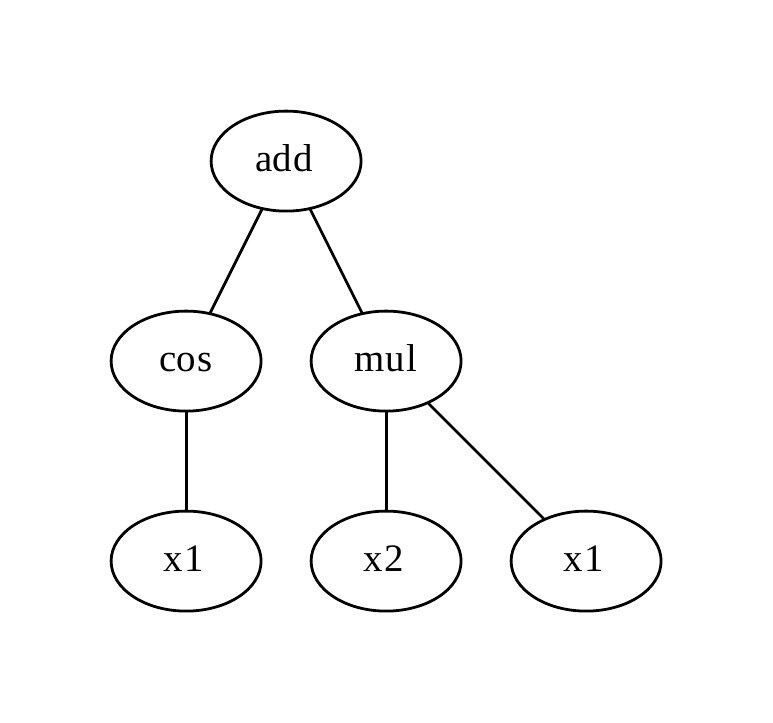

In [ ]:
# 1 affichage parmis les 10 tests 
filepath="res_elitist_res_2022_04_19-18-39-56/hof0_tree_gen200.pdf"
from pdf2image import convert_from_path

images = convert_from_path(filepath)
images[0]  # first page


## Commentaire sur le résultat : 

Apres avoir éxécuté plusieurs fois le test, on obtient bien la fonction demandé : x*y+cos(x), de plus on a meme une erreur = 0 pour le train et pour le test.

# DEUXIEME TEST : **DOUBLE TOURNOI**

## Lancement du test 

In [ ]:
!python symbolic_regression.py --selection  double_tournament

Number of generations: 200
Population size: 400
Number of offspring to generate: 400
Selection scheme: double_tournament
Basename of the results dir: res
Putting the results in : res_double_tournament_res_2022_04_19-19-28-14
Hall-of-fame: best solution
symbolic_regression.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  return left / right
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
   	      	                      fitness                      	                     height                     	                      size                     
   	      	---------------------------------------------------	------------------------------------------------	-----------------------------------------------
gen	nevals	avg	gen	max	min      	nevals	std	avg   	gen	max	min	nevals	std     	avg   	gen	max	min	nevals	std    
0  	400   	inf	0  	inf	0.0442736	400   	nan	1.9875	

## Affichage 

In [ ]:
# 1 affichage parmis les 10 tests 
filepath="res_elitist_res_2022_04_19-18-39-56/hof0_tree_gen200.pdf"
from pdf2image import convert_from_path

images = convert_from_path(filepath)
images[0]  # first page


## Commentaire sur le résultat : 

# TROISIEME TEST : NSGA2

## Lancement du test

In [ ]:
!python symbolic_regression.py --nb_gen 20 

Number of generations: 20
Population size: 400
Number of offspring to generate: 400
Selection scheme: nsga2
Basename of the results dir: res
Putting the results in : res_nsga2_res_2022_04_20-21-08-10
Hall-of-fame: Pareto front
   	      	                           fitness                            	                     height                     	                      size                     
   	      	--------------------------------------------------------------	------------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max        	min      	nevals	std   	avg   	gen	max	min	nevals	std     	avg   	gen	max	min	nevals	std    
0  	400   	6049.25	0  	2.03431e+06	0.0345592	400   	103211	1.9675	0  	3  	1  	400   	0.831531	5.8525	0  	15 	2  	400   	3.54905
1  	241   	0.298554	1  	0.827497   	0.0345592	241   	0.206568	1.7875	1  	5  	0  	241   	0.867378	4.4525	1  	17 	1  	241   	2.79155
2  	242   	0.132266	2  	0.260748   	0.024619

## Affichage

In [ ]:
# 1 affichage parmis les 10 tests 
filepath="res_elitist_res_2022_04_19-18-39-56/hof0_tree_gen200.pdf"
from pdf2image import convert_from_path

images = convert_from_path(filepath)
images[0]  # first page


## Commentaire sur le résultat

# **1.2**  
Ajoutez du bruit à vos fonctions et observez le résultat obtenu (mettez des valeurs qui sont faibles devant les données, par exemple 0.0001).

# Ellitiste

In [ ]:
!python symbolic_regression.py --selection  elitist --noise 0.0001

Number of generations: 200
Population size: 400
Number of offspring to generate: 400
Selection scheme: elitist
Basename of the results dir: res
Putting the results in : res_elitist_res_2022_04_19-19-30-58
Hall-of-fame: best solution
   	      	                        fitness                        	                     height                     	                     size                     
   	      	-------------------------------------------------------	------------------------------------------------	----------------------------------------------
gen	nevals	avg    	gen	max    	min      	nevals	std    	avg 	gen	max	min	nevals	std     	avg   	gen	max	min	nevals	std   
0  	400   	111.668	0  	14595.6	0.0465701	400   	991.553	1.96	0  	3  	1  	400   	0.814494	5.8775	0  	15 	2  	400   	3.6059
1  	244   	0.375452	1  	0.909211	0.0416928	244   	0.283925	1.895	1  	4  	0  	244   	0.885424	4.8975	1  	17 	1  	244   	3.08658
2  	237   	0.138568	2  	0.34984 	0.0416928	237   	0.0729192	1.8725	2  

# Double tournoi

In [ ]:
!python symbolic_regression.py --selection  double_tournament --noise 0.0001

Number of generations: 200
Population size: 400
Number of offspring to generate: 400
Selection scheme: double_tournament
Basename of the results dir: res
Putting the results in : res_double_tournament_res_2022_04_19-19-33-05
Hall-of-fame: best solution
   	      	                           fitness                            	                    height                    	                      size                     
   	      	--------------------------------------------------------------	----------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max        	min     	nevals	std   	avg   	gen	max	min	nevals	std   	avg   	gen	max	min	nevals	std    
0  	400   	8650.36	0  	3.03663e+06	0.100478	400   	152316	2.0375	0  	3  	1  	400   	0.8038	6.1975	0  	15 	2  	400   	3.67675
1  	223   	0.12775	1  	0.56051    	0.100542	223   	0.0464069	1.3625	1  	3  	0  	223   	0.664149	2.645 	1  	8  	1  	223   	1.17217
2  	234   	0.101177	2  	0.119

# NSGA2

In [ ]:
!python symbolic_regression.py --selection  nsga2 --noise 0.0001

Number of generations: 200
Population size: 400
Number of offspring to generate: 400
Selection scheme: nsga2
Basename of the results dir: res
Putting the results in : res_nsga2_res_2022_04_19-19-35-20
Hall-of-fame: Pareto front
Traceback (most recent call last):
  File "symbolic_regression.py", line 251, in <module>
    pop, log = algorithms.eaMuPlusLambda(population, toolbox, mu, lambda_, cxpb, mutpb, ngen, mstats, hof, verbose=True)
  File "/usr/local/lib/python3.7/dist-packages/deap/algorithms.py", line 303, in eaMuPlusLambda
    ind.fitness.values = fit
  File "/usr/local/lib/python3.7/dist-packages/deap/base.py", line 188, in setValues
    assert len(values) == len(self.weights), "Assigned values have not the same length than fitness weights"
AssertionError: Assigned values have not the same length than fitness weights


# 1.3 Avec la fonction f2

## Sans noise 

In [ ]:
!python symbolic_regression.py --selection  elitist --problem f2

Number of generations: 200
Population size: 400
Number of offspring to generate: 400
Selection scheme: elitist
Basename of the results dir: res
Putting the results in : res_elitist_res_2022_04_19-19-35-22
Hall-of-fame: best solution
symbolic_regression.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  return left / right
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
   	      	                      fitness                      	                     height                     	                      size                     
   	      	---------------------------------------------------	------------------------------------------------	-----------------------------------------------
gen	nevals	avg	gen	max	min     	nevals	std	avg   	gen	max	min	nevals	std     	avg   	gen	max	min	nevals	std    
0  	400   	inf	0  	inf	0.117389	400   	nan	2.0075	0  	3  	1  	400   	0.8

## Avec noise 

In [ ]:
!python symbolic_regression.py --selection  elitist --problem f2 --noise 0.0001

Number of generations: 200
Population size: 400
Number of offspring to generate: 400
Selection scheme: elitist
Basename of the results dir: res
Putting the results in : res_elitist_res_2022_04_19-19-38-43
Hall-of-fame: best solution
   	      	                                  fitness                                  	                     height                    	                      size                     
   	      	---------------------------------------------------------------------------	-----------------------------------------------	-----------------------------------------------
gen	nevals	avg        	gen	max       	min     	nevals	std        	avg   	gen	max	min	nevals	std    	avg  	gen	max	min	nevals	std    
0  	400   	4.46102e+09	0  	1.7844e+12	0.157903	400   	8.91084e+10	1.9925	0  	3  	1  	400   	0.80774	6.065	0  	15 	2  	400   	3.58968
1  	235   	0.564136   	1  	1.00874   	0.157301	235   	0.25528    	1.9525	1  	5  	0  	235   	0.880479	5.22 	1  	15 	1  	235   	2.91746
2

# 2. Fitness & Nouveauté

L'environnement `FastsimSimpleNavigation-v0` de gym_fastsim permet de lancer des expériences de navigation avec un robot à roues naviguant dans un labyrinthe. Vous allez dans cette partie reproduire les expériences de Lehman et Stanley sur la recherche de nouveauté. Vous allez faire différentes variantes de cette expérience, certaines étant en mono- d'autres étant en multi-objectif. Pour simplifier, dans tous les cas, vous utiliserez NSGA-2, qui est équivalent à une stratégie élitiste en mono-objectif.

Pour installer l'environnement dans collab ou jupyter, utiliser les commandes suivantes:

In [ ]:
!git clone https://github.com/sferes2/libfastsim
!cd libfastsim && ./waf configure build install
!git clone https://github.com/alexendy/pyfastsim
!cd pyfastsim && pip install .
!git clone https://github.com/alexendy/fastsim_gym
!cd fastsim_gym && pip install .

Cloning into 'libfastsim'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 268 (delta 4), reused 8 (delta 2), pack-reused 252
Receiving objects: 100% (268/268), 268.37 KiB | 3.35 MiB/s, done.
Resolving deltas: 100% (160/160), done.
Setting top to                           : /content/libfastsim 
Setting out to                           : /content/libfastsim/build 
configuring b-optimize
Checking for 'g++' (C++ compiler)        : /usr/bin/g++ 
Checking for 'gcc' (C compiler)          : /usr/bin/gcc 
Checking for SDL (1.2 - sdl-config)      : sdl-config not found 
['-Wall', '-O3', '-msse2', '-fPIC']
'configure' finished successfully (0.181s)
Waf: Entering directory `/content/libfastsim/build'
[ 1/11] Compiling src/linear_camera.cpp
[ 2/11] Compiling src/map.cpp
[ 3/11] Compiling src/display.cpp
[ 4/11] Compiling src/robot.cpp
[ 5/11] Compiling src/light_sensor.cpp
[ 6/11] Compiling src/r

Remarque: pour une installation sur les machines de TME, vous n'aurez pas les droits pour installer fastsim dans les répertoires système. Dans ce cas, vous pouvez ajouter l'installer dans votre répertoire en ajoutant un argument 'prefix' au waf configure et ajouter le répertoire des libs ainsi créé à la variable d'environnement LIBRARY_PATH et le répertoire des fichiers headers à la variable d'environnement CPATH. Une fois cela fait, vous pouvez faire appel au pip install de pyfastsim puis de fastsim_gym.

In [ ]:
import gym
import gym_fastsim

ModuleNotFoundError: ignored

**2.1-**  Lancer une première expérience dans laquelle le robot doit atteindre la sortie du labyrinthe. Vous pourrez essayer avec la reward de l'expérience, qui est une reward binaire (sortie atteinte ou non) et avec une fitness plus continue dans laquelle la récompense est la distance à la sortie (à minimiser donc). Pour observer le comportement de la recherche effectuée, vous pourrez écrire la position du robot à la fin de l'évaluation et ensuite tracer ces positions avec les fonctions fournies dans `maze_plot.py` (vous pouvez aussi tracer les trajectoires, mais comme il y a 2000 positions par évaluation, dans ce cas, vous pourrez n'écrire qu'une position sur 100, par exemple).

Quelles parties de l'espace ont été explorées dans les deux cas ? Est-ce que la sortie est atteinte (vous vous limiterez à 200 générations) ? Si oui, au bout de combien de générations ?

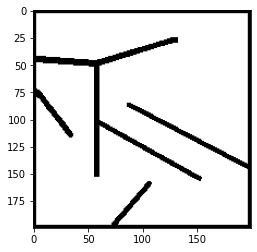

In [ ]:
#<ANSWER>
bg = "maze_hard.pbm"
plt.figure()
img = plt.imread(bg)
plt.imshow(img)
#</ANSWER>

In [ ]:
!python gym_fastsim_maze.py

Number of generations: 200
Population size: 100
Variant: FIT
nsga2_NS: destroying myfitness
Creator: FIT
/usr/local/lib/python3.7/dist-packages/scoop/fallbacks.py:46: RuntimeWarning: SCOOP was not started properly.
Be sure to start your program with the '-m scoop' parameter. You can find further information in the documentation.
Your map call has been replaced by the builtin serial Python map().
  RuntimeWarning
/content/nn.py:14: RuntimeWarning: overflow encountered in exp
  return 1./(1 + np.exp(-x))
<Figure size 640x480 with 1 Axes>
/content/nn.py:14: RuntimeWarning: overflow encountered in exp
  return 1./(1 + np.exp(-x))
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 

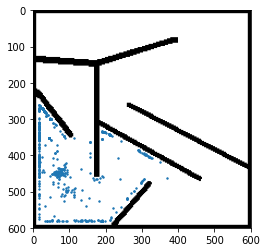

In [ ]:
plot_points_file("bd.log")

**2.2-** Lancer la même expérience, mais avec un critère de nouveauté. Vous pourrez pour cela partir du code fourni pour le calcul de nouveauté (`novelty_search.py`) et le compléter.  

In [ ]:
#<ANSWER>

#</ANSWER>

**2.3-** Utiliser en même temps la fitness et le critère de nouveauté avec NSGA-2. Mesurez le temps moyen pour atteindre la sortie. 

In [ ]:
#<ANSWER>

#</ANSWER>

## Annexes


In [ ]:
from IPython.core.magic import register_cell_magic
@register_cell_magic
def run_and_save(line, cell):
    print("Run and save python code block to file: "+line)
    with open(line, 'wt') as fd:
        fd.write(cell)
    code = compile(cell, line, 'exec')
    exec(code, globals())

### Question 1.1 à 1.3

In [ ]:
%%writefile symbolic_regression.py

# cellule à compléter au niveau des balises <ANSWER></ANSWER>

from deap import creator, gp, base, tools, algorithms
import operator
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import argparse
import pickle
import datetime
import sys
import os


def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

def ru():
    return random.uniform(-1,1)



def evalSymbReg(individual, input, output, nb_obj=1):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)
    sqerrors=[]
    for i in range(len(input)):
        sqerrors.append((func(*input[i])-output[i])**2)
    if (nb_obj==1):
        return math.fsum(sqerrors) / len(sqerrors),
    else:
        return math.fsum(sqerrors) / len(sqerrors), len(individual)


def affichage(train_error,test_error,taille_len):
  plt.figure()
  plt.plot(train_error)
  plt.title("train_error")
  plt.show()
  plt.close()

  plt.figure()
  plt.plot(test_error)
  plt.title("test_error")
  plt.show()
  plt.close()

  plt.figure()
  plt.plot(taille_len)
  plt.title("taille_len")
  plt.show()
  plt.close()

if (__name__ == "__main__"):
  train_error = []
  test_error = []
  taille_len = [] 
  for _ in range(2):


      random.seed()


      parser = argparse.ArgumentParser(description='Launch symbolic regression run.')

      parser.add_argument('--nb_gen', type=int, default=200,
                          help='number of generations')
      parser.add_argument('--mu', type=int, default=400,
                          help='population size')
      parser.add_argument('--lambda_', type=int, default=400,
                          help='number of individuals to generate')
      parser.add_argument('--res_dir', type=str, default="res",
                          help='basename of the directory in which to put the results')
      parser.add_argument('--selection', type=str, default="nsga2", choices=['elitist', 'double_tournament', 'nsga2'],
                          help='selection scheme')
      parser.add_argument('--problem', type=str, default="f1", choices=['f1', 'f2'],
                          help='function to fit')

      # for question 1.2
      parser.add_argument('--noise', type=float, default="0.",
                          help='noise added to the model to fit (gaussian, mean=0, sigma=noise)')

      args = parser.parse_args()
      print("Number of generations: "+str(args.nb_gen))
      ngen=args.nb_gen
      print("Population size: "+str(args.mu))
      mu=args.mu
      print("Number of offspring to generate: "+str(args.lambda_))
      lambda_=args.lambda_
      print("Selection scheme: "+str(args.selection))
      sel=args.selection
      if (sel=="nsga2"):
          nb_obj=2
      else:
          nb_obj=1
      print("Basename of the results dir: "+str(args.res_dir))
      name=args.res_dir

      if (nb_obj==1):
          creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
      elif (nb_obj==2):
          creator.create("FitnessMin",base.Fitness,weights=(-1.0,))

      creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

      noise=args.noise
      problem=args.problem

      d=datetime.datetime.today()
      if(name!=""):
          sep="_"
      else:
          sep=""
      run_name=name+"_"+sel+"_"+d.strftime(name+sep+"%Y_%m_%d-%H-%M-%S")
      try:
          os.makedirs(run_name)
      except OSError:
          pass

      print("Putting the results in : "+run_name)

      stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
      stats_size = tools.Statistics(len)
      stats_height = tools.Statistics(lambda ind: ind.height)
      mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size, height=stats_height)
      mstats.register("avg", np.mean)
      mstats.register("std", np.std)
      mstats.register("min", np.min)
      mstats.register("max", np.max)
      
      if (problem=="f1"):
          nb_dim=2
          # train
          input_training=[]
          output_training=[]
          # test
          input_testing=[]
          output_testing=[]

          name_vars={"ARG0": "x1", "ARG1": "x2"}

          # Complétez pour générer l'ensemble d'entrainement et de validation avec une fonction choisie à 2 dimensions
          #<ANSWER>
          def f(x):
            """ x * y + cos(x)"""
            return x[0] * x[1]+np.cos(x[0])

          """30 valeurs differentes de x et de y """
          input_training=[(random.uniform(0, 1.0), random.uniform(0, 1.0)) for i in range(30)]
          output_training=[f(x) for x in input_training]

          input_testing=[(random.uniform(0, 1.0), random.uniform(0, 1.0)) for i in range(30)]
          output_testing=[f(x) for x in input_testing]
          
          #</ANSWER>
      # en OPTION: vous pouvez faire des tests sur d'autres fonctions    
      elif (problem=="f2"):
          #<ANSWER>
          nb_dim=3
          # train
          input_training=[]
          output_training=[]
          # test
          input_testing=[]
          output_testing=[]

          def f(x):
            return x[0]+ x[1]*np.cos(2*np.pi*x[2])

          input_training=[(random.uniform(0, 1.0), random.uniform(0, 1.0),random.uniform(0, 1.0)) for i in range(30)]
          output_training=[f(x) for x in input_training]
          input_testing=[(random.uniform(0, 1.0), random.uniform(0, 1.0),random.uniform(0, 1.0)) for i in range(30)]
          output_testing=[f(x) for x in input_testing]
          name_vars={"ARG0": "x1", "ARG1": "x2","ARG2": "x3"}
          #</ANSWER>
          
      pset = gp.PrimitiveSet("MAIN", nb_dim)

      # Complétez pour constituer l'ensemble de primitives qui pourront être utilisées
      #<ANSWER>
      pset.addPrimitive(operator.add,2)
      pset.addPrimitive(operator.sub,2)
      pset.addPrimitive(operator.mul,2)
      pset.addPrimitive(protectedDiv,2,"div")
      pset.addPrimitive(np.cos,1,"cos")
      pset.addPrimitive(np.sin,1,"sin")
      #</ANSWER>

      pset.addTerminal(1)
      pset.addEphemeralConstant("cst", ru )
      pset.renameArguments(**name_vars)

      cxpb=0.5
      mutpb=0.1


      toolbox = base.Toolbox()

      # En vous inspirant des exemples de programmation génétique dans DEAP, 
      # enregistrez les différents opérateurs que vous utiliserez dans la suite.
      # Vous choisirez l'opérateur de sélection en fonction de la variable sel 
      # (voir valeurs possibles dans le parser d'arguments)
      #<ANSWER>
      # toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
      toolbox.register("expr", gp.genFull, pset=pset, min_=1, max_=3)

      toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)

      toolbox.register("population", tools.initRepeat, list, toolbox.individual)
      toolbox.register("compile", gp.compile, pset=pset)

      toolbox.register("evaluate",evalSymbReg,input=input_training,output=output_training)

      if(sel=="elitist"):
          toolbox.register("select",tools.selBest,fit_attr="fitness")
      if(sel=="double_tournament"):
          toolbox.register("select",tools.selDoubleTournament,fitness_size=10,parsimony_size=2,fitness_first=True,fit_attr="fitness")
      if(sel=="nsga2"):
          toolbox.register("select",tools.selNSGA2)

      toolbox.register("mate", gp.cxOnePoint)
      toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
      toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

      toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
      toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))


      stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
      stats_size = tools.Statistics(len)
      stats_height = tools.Statistics(lambda ind: ind.height)
      mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size, height=stats_height)
      mstats.register("avg", np.mean)
      mstats.register("std", np.std)
      mstats.register("min", np.min)
      mstats.register("max", np.max)
      #</ANSWER>


      pop = toolbox.population(n=400)

      if (nb_obj==1):
          print("Hall-of-fame: best solution")
          hof = tools.HallOfFame(1)
      else:
          print("Hall-of-fame: Pareto front")
          hof=tools.ParetoFront()

      # Pour simplifier, plutôt que d'écrire la boucle, vous pourrez utiliser un algorithme tout intégré, 
      # par exemple eaMuPlusLambda (cf https://deap.readthedocs.io/en/master/api/algo.html). 
      # Cela ne permettra pas de générer un NSGA-II complet, mais cela vous permettra de faire de premiers tests.
      # En option, si vous avez le temps, vous pourrez tester un NSGA-II complet pour voir si cela change les résultats.
      #<ANSWER>
      population=toolbox.population(n=mu)
      pop, log = algorithms.eaMuPlusLambda(population, toolbox, mu, lambda_, cxpb, mutpb, ngen, mstats, hof, verbose=True)
      #</ANSWER>
      
      # Affichage des résultats. Tout est dans le répertoire run_name
      avg,dmin,dmax=log.chapters['fitness'].select("avg", "min", "max")
      gen=log.select("gen")

      plt.figure()
      plt.yscale("log")
      plt.plot(gen[1:],dmin[1:])
      plt.title("Minimum error")
      plt.savefig(run_name+"/min_error_gen%d.pdf"%(ngen))
      plt.close()

      plt.figure()
      plt.yscale("log")
      plt.fill_between(gen[1:], dmin[1:], dmax[1:], alpha=0.25, linewidth=0)
      plt.plot(gen[1:],avg[1:])
      plt.title("Average error")
      plt.savefig(run_name+"/avg_error_gen%d.pdf"%(ngen))
      plt.close()

      avg,dmin,dmax=log.chapters['size'].select("avg", "min", "max")
      gen=log.select("gen")
      plt.figure()
      plt.yscale("log")
      plt.fill_between(gen[1:], dmin[1:], dmax[1:], alpha=0.25, linewidth=0)
      plt.plot(gen[1:],avg[1:])
      plt.title("Average size")
      plt.savefig(run_name+"/avg_size_gen%d.pdf"%(ngen))
      plt.close()

      avg,dmin,dmax=log.chapters['height'].select("avg", "min", "max")
      gen=log.select("gen")
      plt.figure()
      plt.yscale("log")
      plt.fill_between(gen[1:], dmin[1:], dmax[1:], alpha=0.25, linewidth=0)
      plt.plot(gen[1:],avg[1:])
      plt.title("Average height")
      plt.savefig(run_name+"/avg_height_gen%d.pdf"%(ngen))
      plt.close()

      with open(run_name+"/pset_gen%d.npz"%(ngen), 'wb') as f:
          pickle.dump(pset, f)


      for i,ind in enumerate(hof):
          print("=========")
          # print("HOF %d, len=%d"%(i,len(ind)))
          print("Error on the training dataset: %f"%(evalSymbReg(ind, input_training, output_training, nb_obj=1)))
          print("Error on the testing dataset: %f"%(evalSymbReg(ind, input_testing, output_testing, nb_obj=1)))
          train_error.append(evalSymbReg(ind, input_training, output_training, nb_obj=1))
          test_error.append(evalSymbReg(ind, input_testing, output_testing, nb_obj=1))
          taille_len.append(len(ind)) 

          with open(run_name+"/hof%d_gen%d.npz"%(i, ngen), 'wb') as f:
              pickle.dump(ind, f)

          nodes, edges, labels = gp.graph(ind)

          ### Graphviz Section ###
          import pygraphviz as pgv

          plt.figure()

          g = pgv.AGraph()
          g.add_nodes_from(nodes)
          g.add_edges_from(edges)
          g.layout(prog="dot")

          for ni in nodes:
              n = g.get_node(ni)
              n.attr["label"] = labels[ni]


          g.draw(run_name+"/hof%d_tree_gen%d.pdf"%(i,ngen))

      print("Results saved in "+run_name)

  print("train_error",train_error)
  print("train_error_mean",np.mean(np.array(train_error)))
  print("test_error",test_error)
  print("test_error_mean",np.mean(np.array(test_error)))
  print("taille",taille_len)
  print("taille_mean",np.mean(np.array(taille_len)))
# affichage(train_error,test_error,taille_len)
  

Overwriting symbolic_regression.py


## Code de la question 2

In [ ]:
%%run_and_save maze_plot.py
#!/usr/bin/python -w

# NE PAS MODIFIER LE CONTENU DE CETTE CELLULE
# Cette cellule contient le code de fonctions permettant de tracer les points atteints 
# par les politiques de navigation générées.
# Ce code n'a pas à être modifié ni complété, il suffit d'exécuter la cellule telle quelle.

import matplotlib.pyplot as plt


def plot_points(points, bg="maze_hard.pbm", title=None):
    x,y = zip(*points)
    fig1, ax1 = plt.subplots()
    ax1.set_xlim(0,600)
    ax1.set_ylim(600,0) # Decreasing
    ax1.set_aspect('equal')
    if(bg):
        img = plt.imread(bg)
        ax1.imshow(img, extent=[0, 600, 600, 0])
    if(title):
        ax1.set_title(title)
    ax1.scatter(x, y, s=2)
    plt.show()
    
def plot_points_lists(lpoints, bg="maze_hard.pbm", title=None):
    fig1, ax1 = plt.subplots()
    ax1.set_xlim(0,600)
    ax1.set_ylim(600,0) # Decreasing
    ax1.set_aspect('equal')
    if(bg):
        img = plt.imread(bg)
        ax1.imshow(img, extent=[0, 600, 600, 0])
    if(title):
        ax1.set_title(title)
    for points in lpoints:
        x,y = zip(*points)
        ax1.scatter(x, y, s=2)
    plt.show()


def plot_points_file(filename, bg="maze_hard.pbm", title=None):
    try:
        with open(filename) as f:
            points=[]
            for l in f.readlines():
                pos=list(map(float, l.split(" ")))
                points.append(pos)
            f.close()
            plot_points(points, bg, title)
    except IOError:
        print("Could not read file: "+f)


Run and save python code block to file: maze_plot.py


In [ ]:
%%run_and_save nn.py
# NE PAS MODIFIER LE CONTENU DE CETTE CELLULE
# Cette cellule contient le code de gestion d'une politique au travers d'un réseau de neurones de structure fixe. 
# Ce code n'a pas à être modifié ni complété, il suffit d'exécuter la cellule telle quelle.

# coding: utf-8

import numpy as np

## Suppress TF info messages

import os

def sigmoid(x):
    return 1./(1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)


def gen_simplemlp(n_in, n_out, n_hidden_layers=2, n_neurons_per_hidden=5):
    n_neurons = [n_neurons_per_hidden]*n_hidden_layers if np.isscalar(n_neurons_per_hidden) else n_neurons_per_hidden
    i = Input(shape=(n_in,))
    x = i
    for n in n_neurons:
        x = Dense(n, activation='sigmoid')(x)
    o = Dense(n_out, activation='tanh')(x)
    m = Model(inputs=i, outputs=o)
    return m
    

class SimpleNeuralControllerNumpy():
    def __init__(self, n_in, n_out, n_hidden_layers=2, n_neurons_per_hidden=5, params=None):
        self.dim_in = n_in
        self.dim_out = n_out
        # if params is provided, we look for the number of hidden layers and neuron per layer into that parameter (a dicttionary)
        if (not params==None):
            if ("n_hidden_layers" in params.keys()):
                n_hidden_layers=params["n_hidden_layers"]
            if ("n_neurons_per_hidden" in params.keys()):
                n_neurons_per_hidden=params["n_neurons_per_hidden"]
        self.n_per_hidden = n_neurons_per_hidden
        self.n_hidden_layers = n_hidden_layers
        self.weights = None 
        self.n_weights = None
        self.init_random_params()
        self.out = np.zeros(n_out)
        #print("Creating a simple mlp with %d inputs, %d outputs, %d hidden layers and %d neurons per layer"%(n_in, n_out,n_hidden_layers, n_neurons_per_hidden))

    
    def init_random_params(self):
        if(self.n_hidden_layers > 0):
            self.weights = [np.random.random((self.dim_in,self.n_per_hidden))] # In -> first hidden
            self.bias = [np.random.random(self.n_per_hidden)] # In -> first hidden
            for i in range(self.n_hidden_layers-1): # Hidden -> hidden
                self.weights.append(np.random.random((self.n_per_hidden,self.n_per_hidden)))
                self.bias.append(np.random.random(self.n_per_hidden))
            self.weights.append(np.random.random((self.n_per_hidden,self.dim_out))) # -> last hidden -> out
            self.bias.append(np.random.random(self.dim_out))
        else:
            self.weights = [np.random.random((self.dim_in,self.dim_out))] # Single-layer perceptron
            self.bias = [np.random.random(self.dim_out)]
        self.n_weights = np.sum([np.product(w.shape) for w in self.weights]) + np.sum([np.product(b.shape) for b in self.bias])

    def get_parameters(self):
        """
        Returns all network parameters as a single array
        """
        flat_weights = np.hstack([arr.flatten() for arr in (self.weights+self.bias)])
        return flat_weights

    def set_parameters(self, flat_parameters):
        """
        Set all network parameters from a single array
        """
        i = 0 # index
        to_set = []
        self.weights = list()
        self.bias = list()
        if(self.n_hidden_layers > 0):
            # In -> first hidden
            w0 = np.array(flat_parameters[i:(i+self.dim_in*self.n_per_hidden)])
            self.weights.append(w0.reshape(self.dim_in,self.n_per_hidden))
            i += self.dim_in*self.n_per_hidden
            for l in range(self.n_hidden_layers-1): # Hidden -> hidden
                w = np.array(flat_parameters[i:(i+self.n_per_hidden*self.n_per_hidden)])
                self.weights.append(w.reshape((self.n_per_hidden,self.n_per_hidden)))
                i += self.n_per_hidden*self.n_per_hidden
            # -> last hidden -> out
            wN = np.array(flat_parameters[i:(i+self.n_per_hidden*self.dim_out)])
            self.weights.append(wN.reshape((self.n_per_hidden,self.dim_out)))
            i += self.n_per_hidden*self.dim_out
            # Samefor bias now
            # In -> first hidden
            b0 = np.array(flat_parameters[i:(i+self.n_per_hidden)])
            self.bias.append(b0)
            i += self.n_per_hidden
            for l in range(self.n_hidden_layers-1): # Hidden -> hidden
                b = np.array(flat_parameters[i:(i+self.n_per_hidden)])
                self.bias.append(b)
                i += self.n_per_hidden
            # -> last hidden -> out
            bN = np.array(flat_parameters[i:(i+self.dim_out)])
            self.bias.append(bN)
            i += self.dim_out
        else:
            n_w = self.dim_in*self.dim_out
            w = np.array(flat_parameters[:n_w])
            self.weights = [w.reshape((self.dim_in,self.dim_out))]
            self.bias = [np.array(flat_parameters[n_w:])]
        self.n_weights = np.sum([np.product(w.shape) for w in self.weights]) + np.sum([np.product(b.shape) for b in self.bias])
    
    def predict(self,x):
        """
        Propagage
        """
        if(self.n_hidden_layers > 0):
            #Input
            a = np.matmul(x,self.weights[0]) + self.bias[0]
            y = sigmoid(a)
            # hidden -> hidden
            for i in range(1,self.n_hidden_layers-1):
                a = np.matmul(y, self.weights[i]) + self.bias[i]
                y = sigmoid(a)
            # Out
            a = np.matmul(y, self.weights[-1]) + self.bias[-1]
            out = tanh(a)
            return out
        else: # Simple monolayer perceptron
            return tanh(np.matmul(x,self.weights[0]) + self.bias[0])


Run and save python code block to file: nn.py


### Question 2.1

In [ ]:
%%run_and_save novelty_search.py

# Cette cellule contient le code permettant de gérer novelty search. 
# Complétez les trous dans les balises <ANSWER></ANSWER>

from scipy.spatial import KDTree
import random
import numpy as np


class NovArchive:
    """Archive used to compute novelty scores."""
    def __init__(self, lbd, k=15):
        self.all_bd=lbd
        self.kdtree=KDTree(self.all_bd)
        self.k=k
        #print("Archive constructor. size = %d"%(len(self.all_bd)))
        
    def update(self,new_bd):
        oldsize=len(self.all_bd)
        self.all_bd=self.all_bd + new_bd
        self.kdtree=KDTree(self.all_bd)
        #print("Archive updated, old size = %d, new size = %d"%(oldsize,len(self.all_bd)))

    def get_nov(self,bd, population=[]):

        # A compléter pour calculer la nouveauté
        # C'est la distance moyenne au self.k plus proches voisins parmi la population 
        # et l'archive, représentée ici par un kdtree (cf https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html)
        #<ANSWER> manhatan
        distance = np.zeros(len(population)+self.k)
        i=0
        for ind in population:
            indx = ind.bd[0]
            indy = ind.bd[1]
            distance[i] = np.sqrt( (bd[0]-indx)**2 + (bd[1]-indy)**2 )
            i+=1
        
        for archive in self.kdtree.query(bd,k=self.k):
            x = archive[0]
            y = archive[1]
            distance[i] = np.sqrt( (bd[0]-x)**2 + (bd[1]-y)**2 )
            i+=1
            
        return np.sum(np.sort(distance)[:self.k])/self.k
        #</ANSWER>
    
    def size(self):
        return len(self.all_bd)
    
def updateNovelty(population, offspring, archive, k=15, add_strategy="random", _lambda=6, verbose=False):
   """Update the novelty criterion (including archive update) 

   Implementation of novelty search following (Gomes, J., Mariano, P., & Christensen, A. L. (2015, July). Devising effective novelty search algorithms: A comprehensive empirical study. In Proceedings of GECCO 2015 (pp. 943-950). ACM.).
   :param population: is the set of indiv for which novelty needs to be computed
   :param offspring: is the set of new individuals that need to be taken into account to update the archive (may be the same as population, but it may also be different as population may contain the set of parents)
   :param k: is the number of nearest neighbors taken into account
   :param add_strategy: is either "random" (a random set of indiv is added to the archive) or "novel" (only the most novel individuals are added to the archive).
   :param _lambda: is the number of individuals added to the archive for each generation
   The default values correspond to the one giving the better results in the above mentionned paper.

   The function returns the new archive
   """
   
   # Novelty scores updates
   if (archive) and (archive.size()>=k):
       if (verbose):
           print("Update Novelty. Archive size=%d"%(archive.size())) 
       for ind in population:
           ind.novelty=archive.get_nov(ind.bd, population)
   else:
       if (verbose):
           print("Update Novelty. Initial step...") 
       for ind in population:
           ind.novelty=0.

   if (verbose):
       print("Fitness (novelty): ",end="") 
       for ind in population:
           print("%.2f, "%(ind.novelty),end="")
       print("")
   if (len(offspring)<_lambda):
       print("ERROR: updateNovelty, lambda(%d)<offspring size (%d)"%(_lambda, len(offspring)))
       return None

   lbd=[]
   # Update of the archive
   if(add_strategy=="random"):
       l=list(range(len(offspring)))
       random.shuffle(l)
       if (verbose):
           print("Random archive update. Adding offspring: "+str(l[:_lambda])) 
       lbd=[offspring[l[i]].bd for i in range(_lambda)]
   elif(add_strategy=="novel"):
       soff=sorted(offspring,lambda x:x.novelty)
       ilast=len(offspring)-_lambda
       lbd=[soff[i].bd for i in range(ilast,len(soff))]
       if (verbose):
           print("Novel archive update. Adding offspring: ")
           for offs in soff[iLast:len(soff)]:
               print("    nov="+str(offs.novelty)+" fit="+str(offs.fitness.values)+" bd="+str(offs.bd))
   else:
       print("ERROR: updateNovelty: unknown add strategy(%s), valid alternatives are \"random\" and \"novel\""%(add_strategy))
       return None
       
   if(archive==None):
       archive=NovArchive(lbd,k)
   else:
       archive.update(lbd)

   return archive


Run and save python code block to file: novelty_search.py


In [ ]:
%%writefile gym_fastsim_maze.py

# Cette cellule contient le code complet de l'expérience de navigation dans le maze.
# Complétez les trous dans les balises <ANSWER></ANSWER>


import gym, gym_fastsim

from deap import *
import numpy as np
from nn import SimpleNeuralControllerNumpy
from scipy.spatial import KDTree

from deap import algorithms
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools
import argparse

import array
import random
import operator
import math

from maze_plot import *

from scoop import futures

from novelty_search import *

weights=(-1.0,1.0)

if (hasattr(creator, "MyFitness")):
    # Deleting any previous definition (to avoid warning message)
    print("Main: destroying myfitness")
    del creator.MyFitness
creator.create("MyFitness", base.Fitness, weights=(weights))

if (hasattr(creator, "Individual")):
    # Deleting any previous definition (to avoid warning message)
    del creator.Individual
creator.create("Individual", list, fitness=creator.MyFitness)

# Evaluation d'un réseau de neurones en utilisant gym
def eval_nn(genotype, nbstep=2000, render=False, name=""):
    """Evaluation d'une politique parametrée par le génotype

    Evaluation d'une politique parametrée par le génotype
    :param genotype: le paramètre de politique à évaluer
    :param nbstep: le nombre maximum de pas de temps
    :param render: affichage/sauvegarde de la trajectoire du robot
    :param name: nom à donner au fichier de log
    """

    # Cette fonction fait l'évaluation d'un genotype utilisé pour
    # paraméter un réseau de neurones de structure fixe.
    # En vue de l'expérience avec novelty_search, elle renvoie:
    # - la fitness: distance à la sortie à minimiser (qui peut se récupérer dans la 4eme valeur de retour de la méthode step, qui est un dictionnaire dans lequel la clé "dist_obj" donne accès à l'opposé de la distance à la sortie)
    # - le descripteur comportemental, qui est la position finale qui est accessible depuis le même dictionnaire (clé "robot_pos", dont il ne faut garder que les 2 premières composantes)
    nn=SimpleNeuralControllerNumpy(5,2,2,10)
    nn.set_parameters(genotype)
    observation = env.reset()
    old_pos=None
    total_dist=0
    if (render):
        f=open("traj"+name+".log","w")

    #<ANSWER>
    for t in range(nbstep):
        if render:
            env.render()
        action=nn.predict(observation)

        observation, reward, done, info = env.step(action) 

        pos=info["robot_pos"][:2]

        if(render):
            f.write(" ".join(map(str,pos))+"\n")
        if (old_pos is not None):
            d=math.sqrt((pos[0]-old_pos[0])**2+(pos[1]-old_pos[1])**2)
            total_dist+=d

        old_pos=list(pos)

        if(done):
            break

    if (render):
        f.close()
        plot_points_file("traj"+name+".log", bg="maze_hard.pbm", title=name)

    dist_obj=info["dist_obj"]
    rpos=[round(x,2) for x in pos]
    return round(dist_obj,2), rpos
    #</ANSWER>


def nsga2_NS(n=100, nbgen=200, IND_SIZE=10, variant="FIT", MIN_V=-30, MAX_V=30, CXPB=0.6, MUTPB=0.3, verbose=False):
    
    # votre code contiendra donc des tests comme suit pour gérer la différence entre ces variantes:
    if (hasattr(creator, "MyFitness")):
        # Deleting any previous definition (to avoid warning message)
        print("nsga2_NS: destroying myfitness")
        del creator.MyFitness

    # Attention: le signe du poids associé à la fitness doit être adapté aux valeurs renvoyées par eval_nn (négatif si valeur à minimiser et positif si à maximiser)
    if (variant=="FIT+NS"):
        print("Creator: FIT+NS")
        creator.create("MyFitness", base.Fitness, weights=(-1.0,1.0))
    elif (variant=="FIT"):
        print("Creator: FIT")
        creator.create("MyFitness", base.Fitness, weights=(-1.0,))
    elif (variant=="NS"):
        print("Creator: NS")
        creator.create("MyFitness", base.Fitness, weights=(1.0,))
    else:
        print("Variante inconnue: "+variant)

    if (hasattr(creator, "Individual")):
        # Deleting any previous definition (to avoid warning message)
        del creator.Individual
    creator.create("Individual", list, fitness=creator.MyFitness)


    toolbox = base.Toolbox()
    toolbox.register("attribute", random.uniform, MIN_V, MAX_V)
    toolbox.register("individual", tools.initRepeat, creator.Individual,
            toolbox.attribute, n=IND_SIZE)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("mate", tools.cxSimulatedBinaryBounded, eta=15, low=MIN_V, up=MAX_V)
    toolbox.register("mutate", tools.mutPolynomialBounded, eta=15, low=MIN_V, up=MAX_V, indpb=1/IND_SIZE)
    toolbox.register("select", tools.selNSGA2, k=n)
    toolbox.register("select_dcd", tools.selTournamentDCD, k=n)
    toolbox.register("evaluate", eval_nn, render=True)
    
    toolbox.register("map",futures.map)


    population = toolbox.population(n=n)
    paretofront = tools.ParetoFront()

    # Permet de sauvegarder les descripteurs comportementaux de tous les individus rencontrés.
    # vous pouvez tracer les descripteurs générés depuis une cellule de jupyter avec la commande:
    # plot_points_file("bd.log")
    fbd=open("bd.log","w")

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses_bds = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, (fit, bd) in zip(invalid_ind, fitnesses_bds):
        #print("Fit: "+str(fit)) 
        #print("BD: "+str(bd))
   
        # Complétez pour positionner fitness.values selon la variante choisie
        #<ANSWER>
        if (variant=="FIT+NS"):
            ind.fitness.values=(fit,0)
        elif (variant=="FIT"):
            ind.fitness.values=(fit,)
        elif (variant=="NS"):
            ind.fitness.values=(0,)
        
        ind.fit = fit
        ind.bd = bd
        #</ANSWER>

        fbd.write(" ".join(map(str,bd))+"\n")
        fbd.flush()
        
    if paretofront is not None:
        paretofront.update(population)

    #print("Pareto Front: "+str(paretofront))

    k=15
    add_strategy="random"
    lambdaNov=6

    # Crée l'archive et mets à jour les champs ind.novelty de chaque individu
    archive=updateNovelty(population,population,None,k,add_strategy,lambdaNov)
    
    # Selon la variante, complétez ind.fitness.values pour ajouter la valeur de ind.novelty qui vient d'être calculée
    #<ANSWER>
    for ind in population:
        if (variant=="FIT+NS"):
            ind.fitness.values=(ind.fit,ind.novelty)
        elif (variant=="FIT"):
            ind.fitness.values=(ind.fit,)
        elif (variant=="NS"):
            ind.fitness.values=(ind.novelty,)
    #</ANSWER>
            
       
    indexmin, valuemin = max(enumerate([i.fit for i in population]), key=operator.itemgetter(1))

    # Pour le calcul des crowdingDistances si utilisation de selTournamentDCD
    population[:] = toolbox.select(population)
    
    # Begin the generational process
    for gen in range(1, nbgen + 1):
        if (gen%10==0):
            print("+",end="", flush=True)
        else:
            print(".",end="", flush=True)

        # Complétez avec un NSGA-2 en prenant soin de mettre à jour les calculs de nouveauté et d'ajouter les
        # nouveautés à la fitness des individus.
 
        # ATTENTION: dans la mise à jour de la nouveauté (updateNovelty), vérifiez bien la signification du premier et du 2eme argument.
        # l'appel fait plus haut doit être adapté: la nouveauté de TOUS les individus doit être recalculée (parents+enfants)
        # et les individus susceptibles d'être ajoutés à l'archive ne doivent être pris que parmi les enfants.
        
        #<ANSWER>
        offspring = algorithms.varOr(population, toolbox, lambdaNov, CXPB, MUTPB)
        
        offspring = list(map(toolbox.clone, offspring))

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses_bds = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, (fit, bd) in zip(invalid_ind, fitnesses_bds):
            if (variant=="FIT+NS"):
                ind.fitness.values=(fit,0)
            elif (variant=="FIT"):
                ind.fitness.values=(fit,)
            elif (variant=="NS"):
                ind.fitness.values=(0,)
            ind.fit = fit
            ind.bd = bd
            fbd.write(" ".join(map(str,bd))+"\n")
            fbd.flush()

        pq=population+offspring
        
        archive=updateNovelty(pq,offspring,archive,k,add_strategy,lambdaNov)

        for ind in pq:
            if (variant=="FIT+NS"):
                ind.fitness.values=(ind.fit,ind.novelty)
            elif (variant=="FIT"):
                ind.fitness.values=(ind.fit,)
            elif (variant=="NS"):
                ind.fitness.values=(ind.novelty,)
        
        ## à faire: choisir la nouvelle population à partir de pq
        population[:] = toolbox.select( population + offspring )
        #</ANSWER>

        # Update the hall of fame with the generated individuals
        if paretofront is not None:
            paretofront.update(population)


        
        # used to track the max value (useful in particular if using only novelty)
        indexmin, newvaluemin = min(enumerate([i.fit for i in pq]), key=operator.itemgetter(1))
        if (newvaluemin<valuemin):
            valuemin=newvaluemin
            print("Gen "+str(gen)+", new min ! min fit="+str(valuemin)+" index="+str(indexmin))
            eval_nn(pq[indexmin],True,"gen%04d"%(gen))
    fbd.close()
    return population, None, paretofront


env = gym.make('FastsimSimpleNavigation-v0')

if (__name__ == "__main__"):

    parser = argparse.ArgumentParser(description='Launch maze navigation experiment.')
    parser.add_argument('--nbgen', type=int, default=200,
                        help='number of generations')
    parser.add_argument('--popsize', type=int, default=100,
                        help='population size')
    parser.add_argument('--res_dir', type=str, default="res",
                        help='basename of the directory in which to put the results')
    parser.add_argument('--variant', type=str, default="FIT", choices=['FIT', 'NS', 'FIT+NS'],
                        help='variant to consider')

    # Il vous est recommandé de gérer les différentes variantes avec cette variable. Les 3 valeurs possibles seront:
    # "FIT+NS": expérience multiobjectif avec la fitness et la nouveauté (NSGA-2)
    # "NS": nouveauté seule
    # "FIT": fitness seule
    # pour les variantes avec un seul objectif, il vous est cependant recommandé d'utiliser NSGA-2 car cela limitera la différence entre les variantes et cela 
    # vous fera gagner du temps pour la suite.
    
    args = parser.parse_args()
    print("Number of generations: "+str(args.nbgen))
    nbgen=args.nbgen
    print("Population size: "+str(args.popsize))
    popsize=args.popsize
    print("Variant: "+args.variant)
    variant=args.variant

    nn=SimpleNeuralControllerNumpy(5,2,2,10)
    IND_SIZE=len(nn.get_parameters())

    pop, logbook, paretofront= nsga2_NS(n=popsize, variant=variant, nbgen=nbgen, IND_SIZE=IND_SIZE)
    #plot_pareto_front(paretofront, "Final pareto front")
    for i,p in enumerate(paretofront):
        print("Visualizing indiv "+str(i)+", fit="+str(p.fitness.values))
        eval_nn(p,True)

    env.close()


Writing gym_fastsim_maze.py
